# Phase 2: Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the hotel booking dataset to:
1. Understand data structure and quality
2. Identify patterns and relationships
3. Discover factors influencing cancellations
4. Prepare insights for feature engineering

## Objectives
- Univariate analysis of all features
- Bivariate analysis with target variable
- Correlation analysis
- Missing value analysis
- Key insights extraction


In [1]:
# Install required packages
%pip install pandas numpy matplotlib seaborn plotly -q


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## Step 1: Load Data

Load data from CSV file or MongoDB (from previous notebook).


In [3]:
# Set path to dataset
import os

# Use relative path from notebook location
csv_path = os.path.join("..", "data", "hotel_bookings.csv")
csv_path = os.path.abspath(csv_path)  # Convert to absolute path
print(f"CSV path: {csv_path}")

# Option 2: Load from MongoDB (from previous notebook)
# from pymongo import MongoClient
# MONGODB_URI = "your_connection_string"
# client = MongoClient(MONGODB_URI)
# db = client["hotel_bookings"]
# collection = db["bookings"]
# cursor = collection.find()
# df = pd.DataFrame(list(cursor))
# if '_id' in df.columns:
#     df = df.drop('_id', axis=1)

# Load data
try:
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"CSV file not found at: {csv_path}")
    df = pd.read_csv(csv_path)
    print(f"✓ Data loaded from CSV: {csv_path}")
except FileNotFoundError as e:
    print(f"CSV not found: {e}")
    print("Please ensure 'hotel_bookings.csv' is in the data folder.")
    df = None

if df is not None:
    print(f"\nDataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


CSV path: /Users/abdelrahman/Developer/Hotel Booking Cancellation Prediction/data/hotel_bookings.csv
✓ Data loaded from CSV: /Users/abdelrahman/Developer/Hotel Booking Cancellation Prediction/data/hotel_bookings.csv

Dataset shape: (119390, 32)
Memory usage: 93.90 MB


## Step 2: Data Overview


In [4]:
# Basic information
print("=== Dataset Information ===")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nFirst few rows:")
display(df.head())


=== Dataset Information ===
Shape: 119,390 rows × 32 columns

Column names and types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Missing values analysis
print("=== Missing Values Analysis ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_pct.values
}).sort_values('Missing Count', ascending=False)

missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    display(missing_df)
    print(f"\nTotal columns with missing values: {len(missing_df)}")
else:
    print("✓ No missing values found!")


=== Missing Values Analysis ===


,Column,Missing Count,Missing Percentage
24,company,112593,94.306893
23,agent,16340,13.686238
13,country,488,0.408744
10,children,4,0.003350



Total columns with missing values: 4


In [6]:
# Statistical summary
print("=== Statistical Summary (Numerical Features) ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[numerical_cols].describe())


=== Statistical Summary (Numerical Features) ===


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Categorical features summary
print("=== Categorical Features Summary ===")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))


=== Categorical Features Summary ===

hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

arrival_date_month:
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
Name: count, dtype: int64

meal:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

country:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

market_segment:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64


=== Target Variable Distribution ===
Not Cancelled (0): 75,166 (62.96%)
Cancelled (1): 44,224 (37.04%)
Total: 119,390


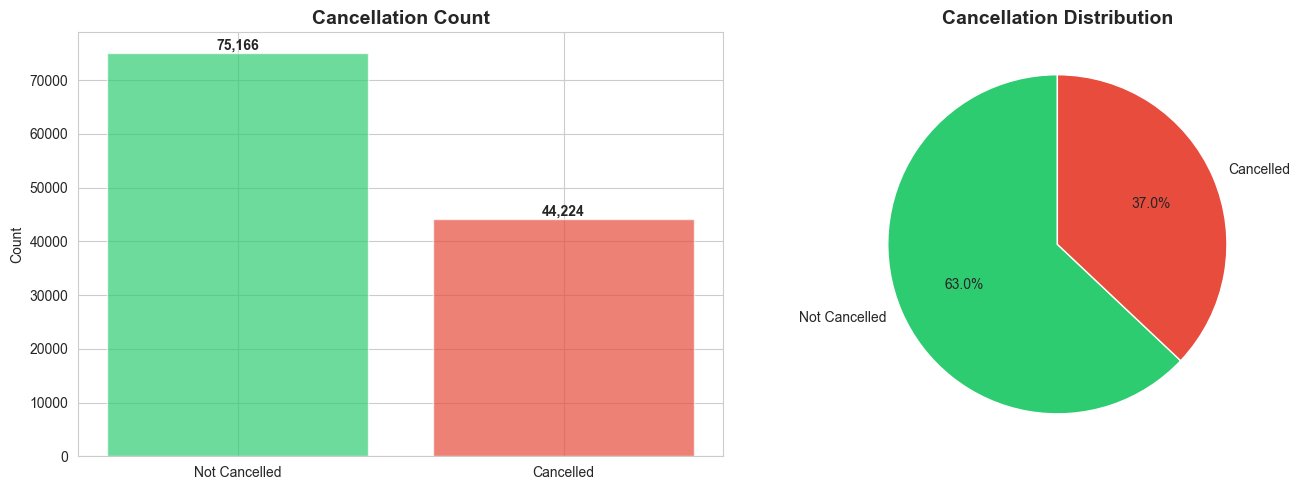

In [8]:
# Target distribution
target_col = 'is_canceled'
cancellation_counts = df[target_col].value_counts()
cancellation_pct = df[target_col].value_counts(normalize=True) * 100

print("=== Target Variable Distribution ===")
print(f"Not Cancelled (0): {cancellation_counts[0]:,} ({cancellation_pct[0]:.2f}%)")
print(f"Cancelled (1): {cancellation_counts[1]:,} ({cancellation_pct[1]:.2f}%)")
print(f"Total: {len(df):,}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Not Cancelled', 'Cancelled'], cancellation_counts.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_title('Cancellation Count', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(cancellation_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(cancellation_counts.values, labels=['Not Cancelled', 'Cancelled'],
           autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Cancellation Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## Step 4: Univariate Analysis - Numerical Features


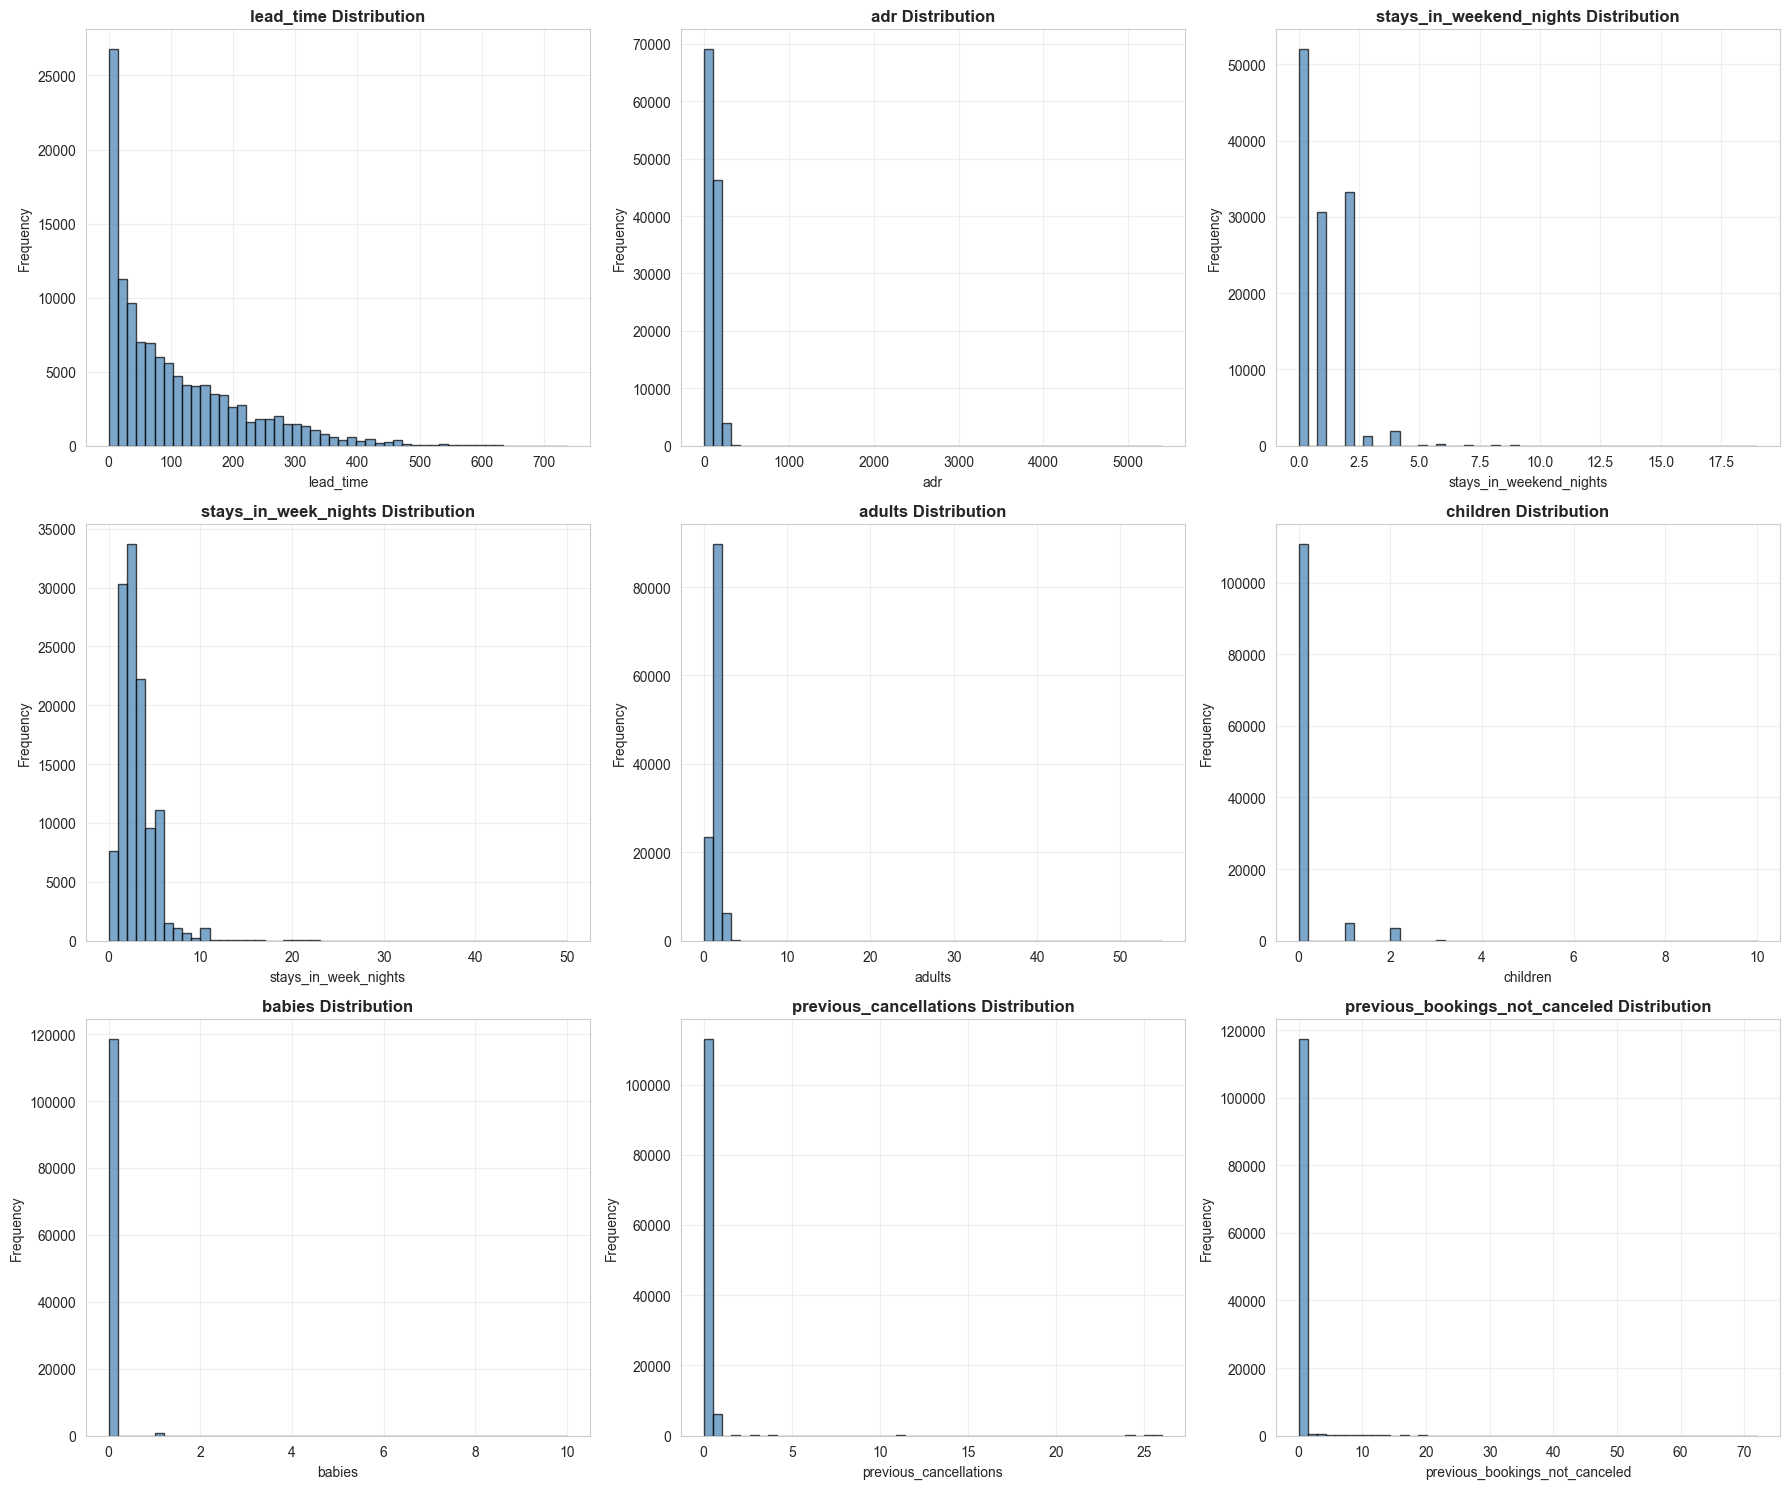

In [9]:
# Key numerical features to analyze
key_numerical = ['lead_time', 'adr', 'stays_in_weekend_nights', 
                 'stays_in_week_nights', 'adults', 'children', 'babies',
                 'previous_cancellations', 'previous_bookings_not_canceled']

# Filter to existing columns
key_numerical = [col for col in key_numerical if col in df.columns]

# Distribution plots
n_cols = 3
n_rows = (len(key_numerical) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(key_numerical):
    axes[i].hist(df[col].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col} Distribution', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(key_numerical), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


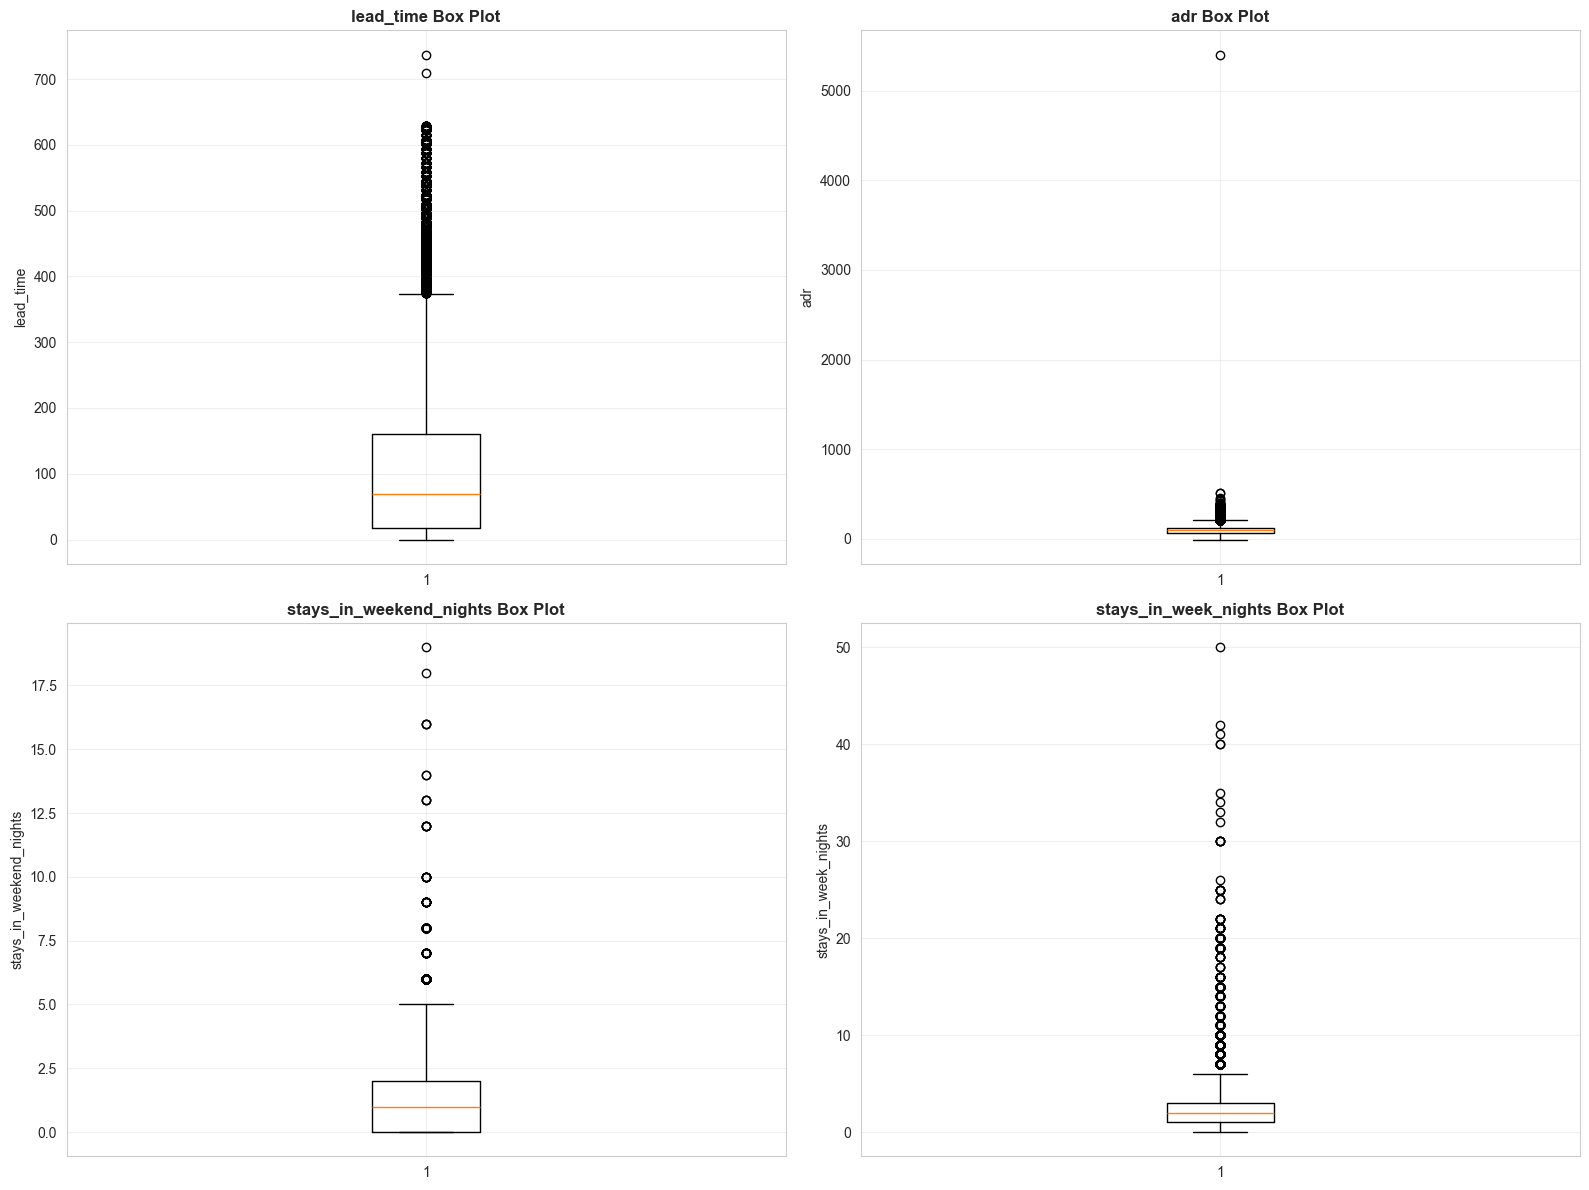

In [10]:
# Box plots for key numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

features_to_plot = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']
for i, col in enumerate(features_to_plot):
    if col in df.columns:
        row = i // 2
        col_idx = i % 2
        axes[row, col_idx].boxplot(df[col].dropna(), vert=True)
        axes[row, col_idx].set_title(f'{col} Box Plot', fontweight='bold')
        axes[row, col_idx].set_ylabel(col)
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 5: Univariate Analysis - Categorical Features


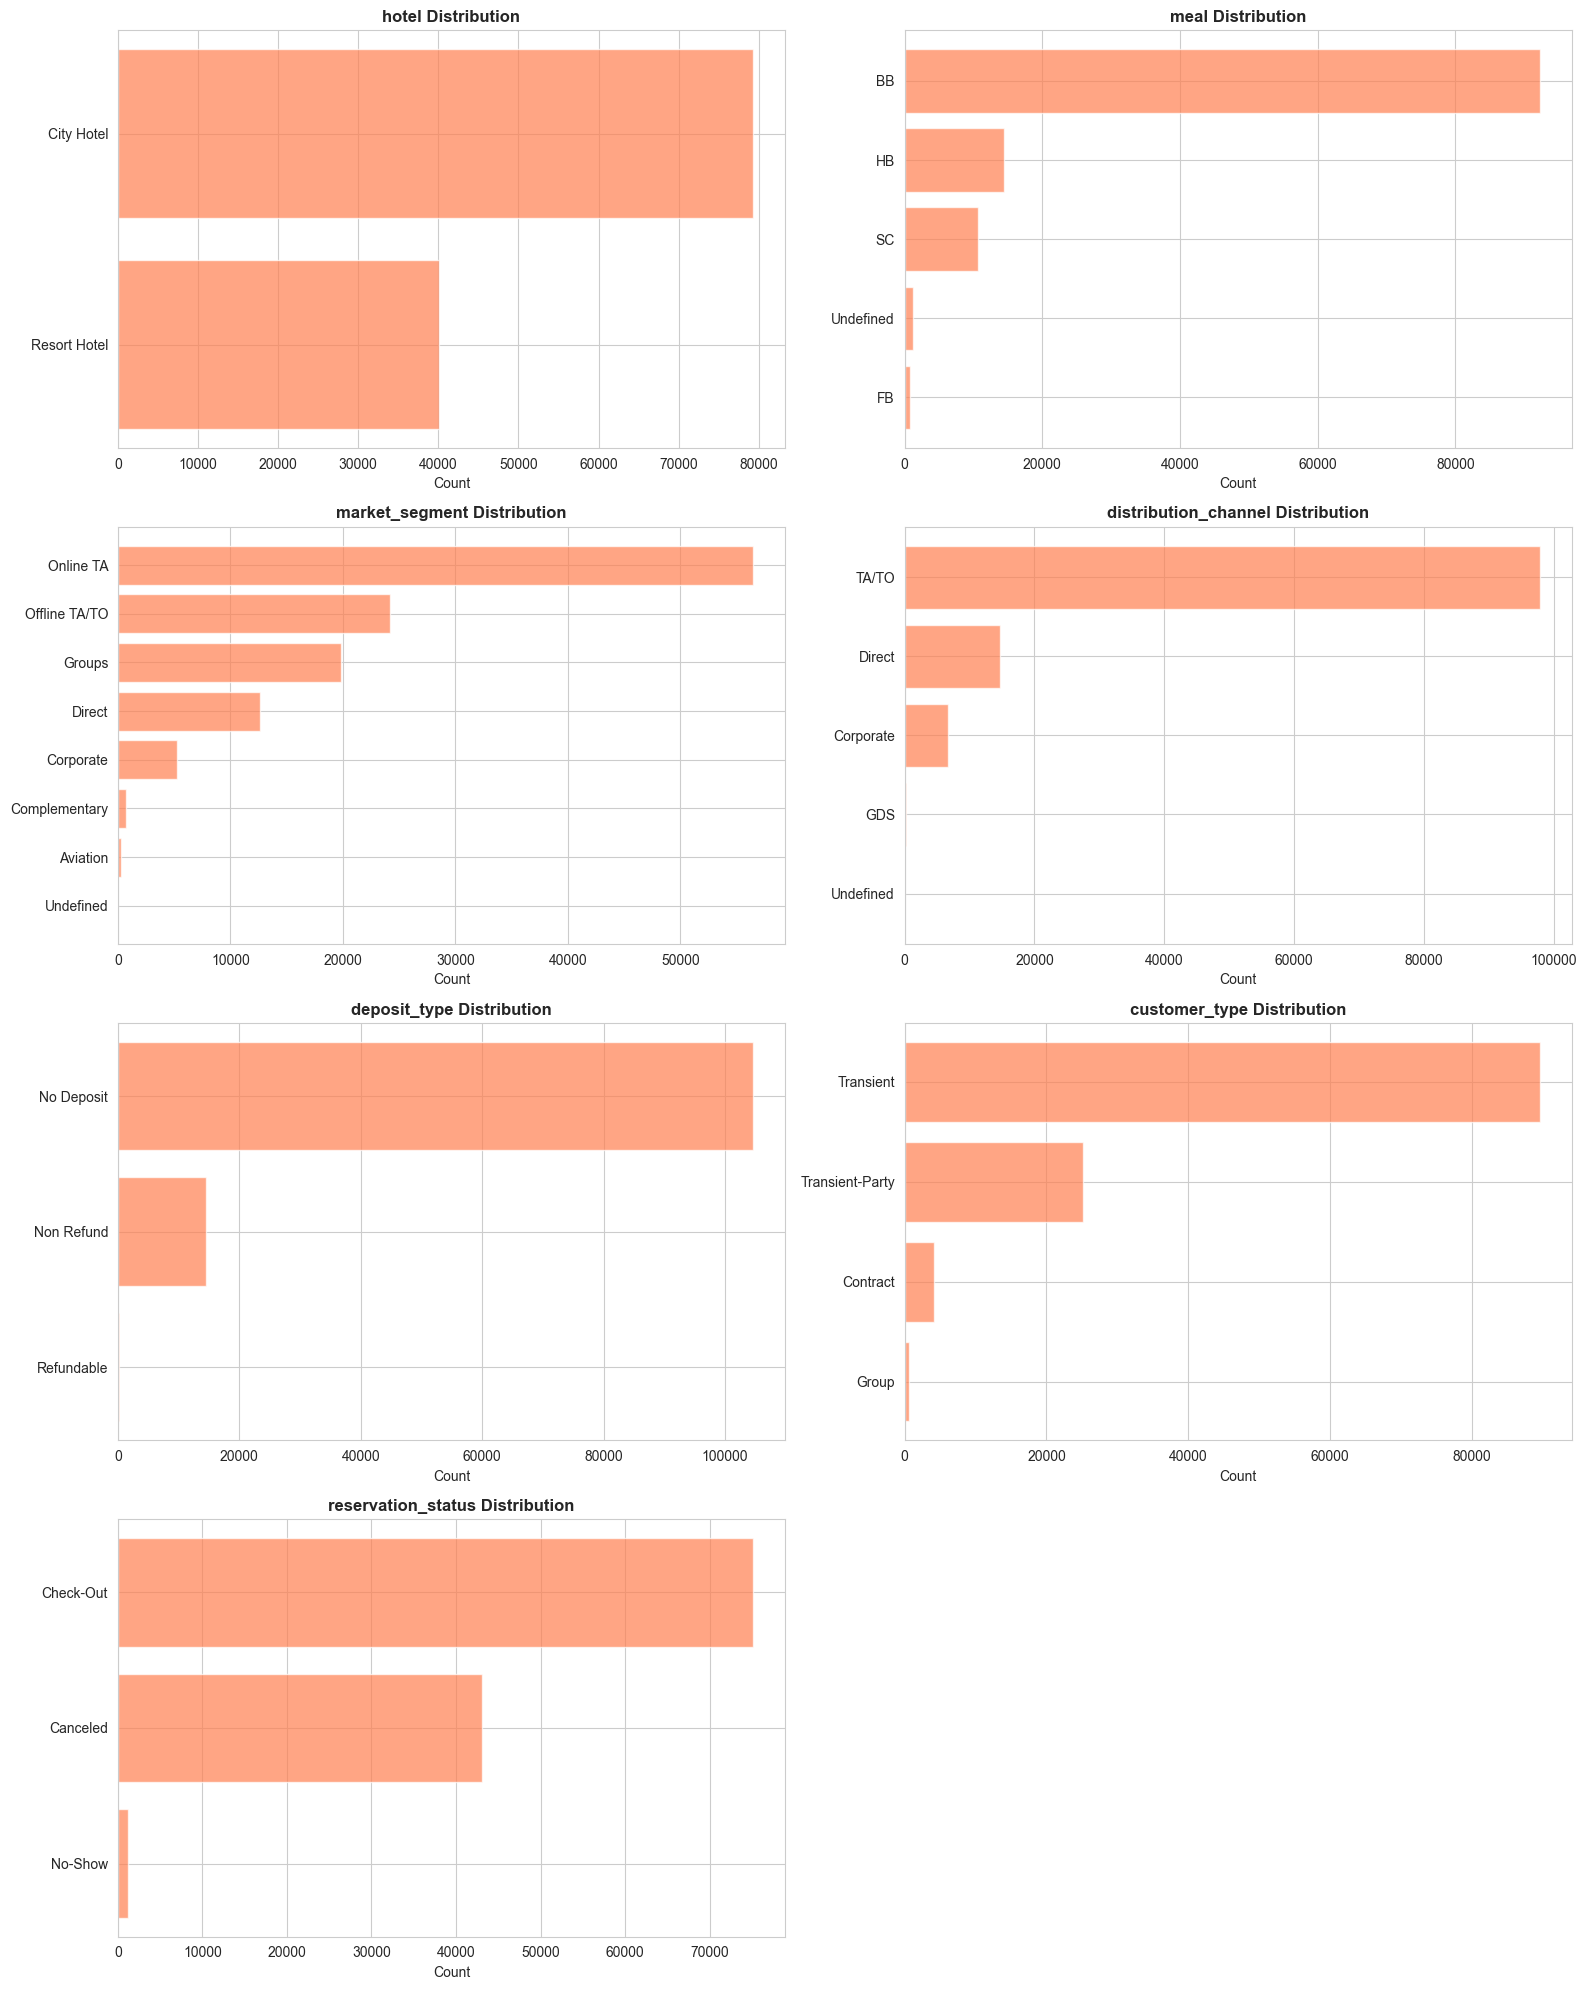

In [11]:
# Key categorical features
key_categorical = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                   'deposit_type', 'customer_type', 'reservation_status']

key_categorical = [col for col in key_categorical if col in df.columns]

# Bar plots for categorical features
n_cols = 2
n_rows = (len(key_categorical) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(key_categorical):
    value_counts = df[col].value_counts().head(10)
    axes[i].barh(range(len(value_counts)), value_counts.values, color='coral', alpha=0.7)
    axes[i].set_yticks(range(len(value_counts)))
    axes[i].set_yticklabels(value_counts.index)
    axes[i].set_title(f'{col} Distribution', fontweight='bold')
    axes[i].set_xlabel('Count')
    axes[i].invert_yaxis()

# Hide extra subplots
for i in range(len(key_categorical), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Step 6: Bivariate Analysis - Cancellation by Features


=== Cancellation Rate by Hotel Type ===


,hotel,total_bookings,cancelled,cancellation_rate
0,City Hotel,79330,33102,41.726963
1,Resort Hotel,40060,11122,27.763355


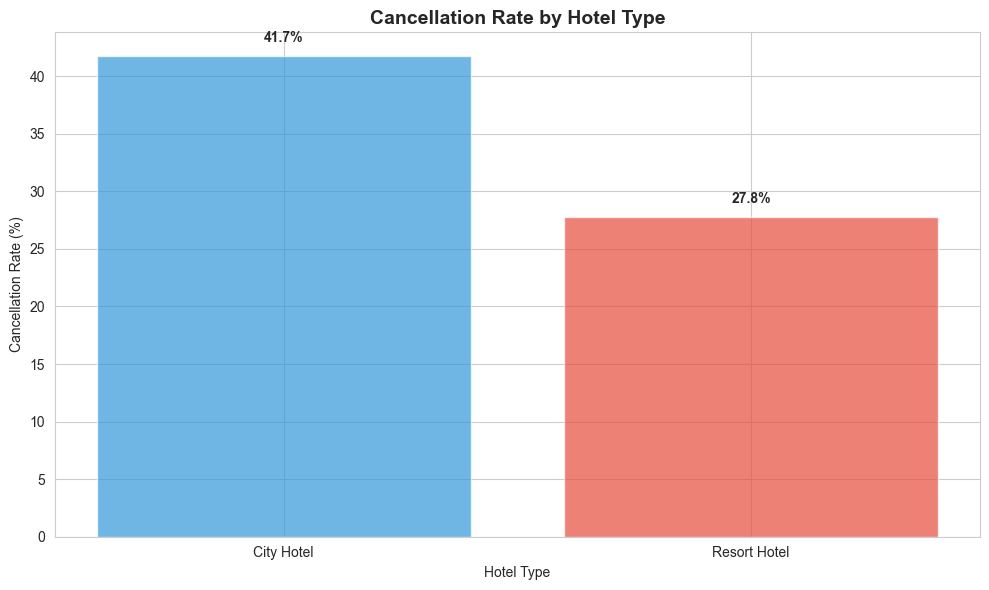

In [12]:
# Cancellation rate by hotel type
print("=== Cancellation Rate by Hotel Type ===")
hotel_cancel = df.groupby('hotel')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
hotel_cancel.columns = ['hotel', 'total_bookings', 'cancelled', 'cancellation_rate']
hotel_cancel['cancellation_rate'] = hotel_cancel['cancellation_rate'] * 100
display(hotel_cancel)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(hotel_cancel['hotel'], hotel_cancel['cancellation_rate'], 
              color=['#3498db', '#e74c3c'], alpha=0.7)
ax.set_title('Cancellation Rate by Hotel Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Cancellation Rate (%)')
ax.set_xlabel('Hotel Type')
for i, (bar, rate) in enumerate(zip(bars, hotel_cancel['cancellation_rate'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
           f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


=== Cancellation Rate by Deposit Type ===


,deposit_type,total_bookings,cancelled,cancellation_rate
1,Non Refund,14587,14494,99.362446
0,No Deposit,104641,29694,28.377022
2,Refundable,162,36,22.222222


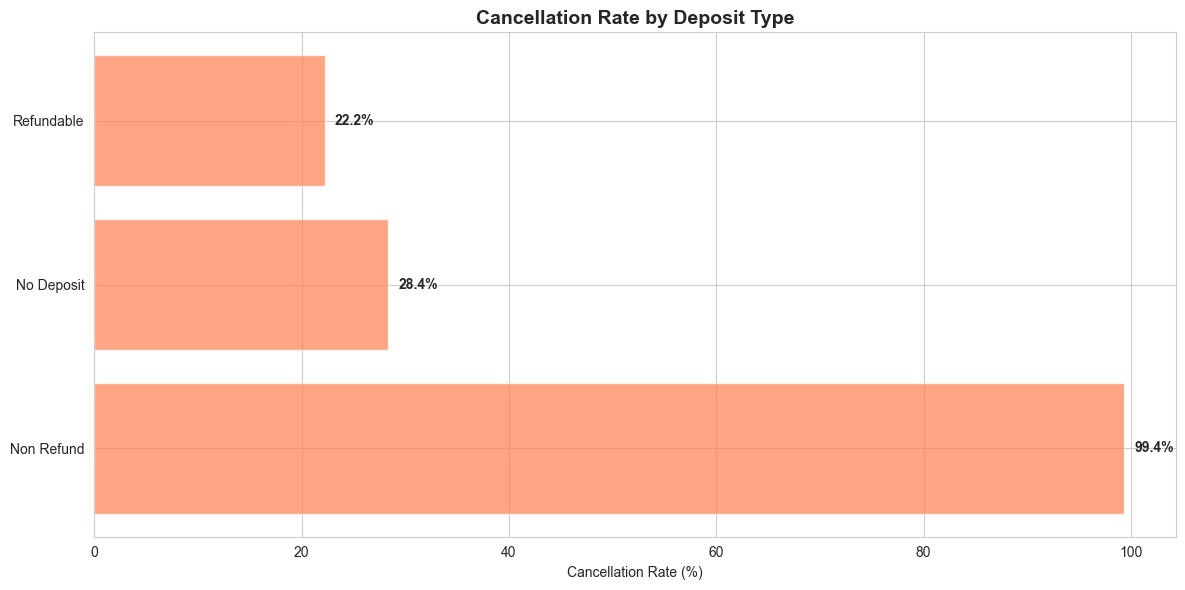

In [13]:
# Cancellation rate by deposit type
print("=== Cancellation Rate by Deposit Type ===")
deposit_cancel = df.groupby('deposit_type')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
deposit_cancel.columns = ['deposit_type', 'total_bookings', 'cancelled', 'cancellation_rate']
deposit_cancel['cancellation_rate'] = deposit_cancel['cancellation_rate'] * 100
deposit_cancel = deposit_cancel.sort_values('cancellation_rate', ascending=False)
display(deposit_cancel)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(deposit_cancel['deposit_type'], deposit_cancel['cancellation_rate'],
              color='coral', alpha=0.7)
ax.set_title('Cancellation Rate by Deposit Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Cancellation Rate (%)')
for i, (bar, rate) in enumerate(zip(bars, deposit_cancel['cancellation_rate'])):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
           f'{rate:.1f}%', ha='left', va='center', fontweight='bold')
plt.tight_layout()
plt.show()


=== Cancellation Rate by Customer Type ===


,customer_type,total_bookings,cancelled,cancellation_rate
2,Transient,89613,36514,40.746320
0,Contract,4076,1262,30.961727
3,Transient-Party,25124,6389,25.429868
1,Group,577,59,10.225303


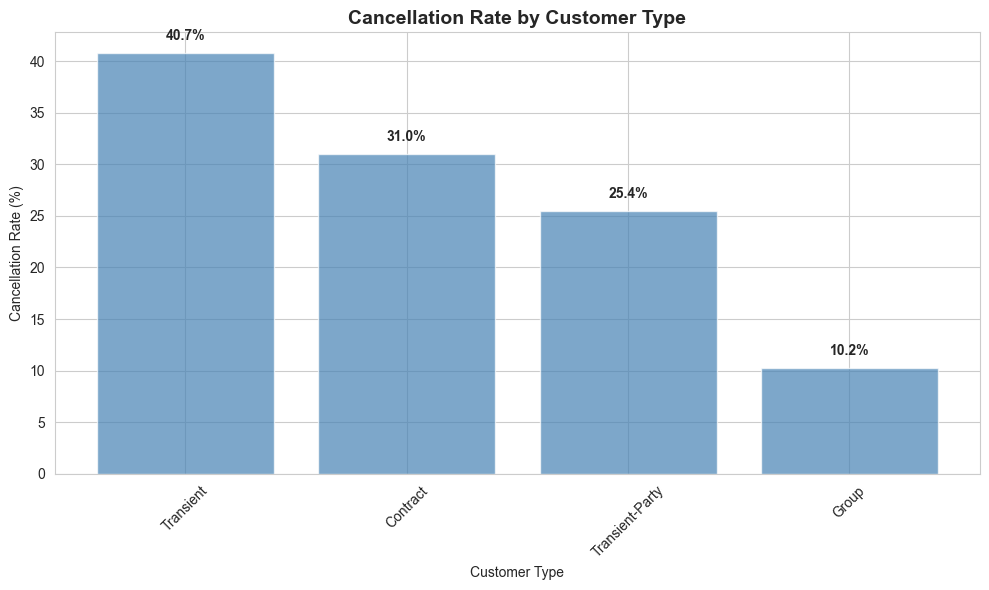

In [14]:
# Cancellation rate by customer type
print("=== Cancellation Rate by Customer Type ===")
customer_cancel = df.groupby('customer_type')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
customer_cancel.columns = ['customer_type', 'total_bookings', 'cancelled', 'cancellation_rate']
customer_cancel['cancellation_rate'] = customer_cancel['cancellation_rate'] * 100
customer_cancel = customer_cancel.sort_values('cancellation_rate', ascending=False)
display(customer_cancel)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(customer_cancel['customer_type'], customer_cancel['cancellation_rate'],
             color='steelblue', alpha=0.7)
ax.set_title('Cancellation Rate by Customer Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Cancellation Rate (%)')
ax.set_xlabel('Customer Type')
plt.xticks(rotation=45)
for bar, rate in zip(bars, customer_cancel['cancellation_rate']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
           f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


=== Lead Time Analysis ===


,lead_time_category,total_bookings,cancelled,cancellation_rate
0,0-30,32361,6755,20.873891
1,31-90,29553,11141,37.698372
2,91-180,26439,11821,44.710466
3,181-365,21544,11947,55.453955
4,365+,3148,2130,67.662008


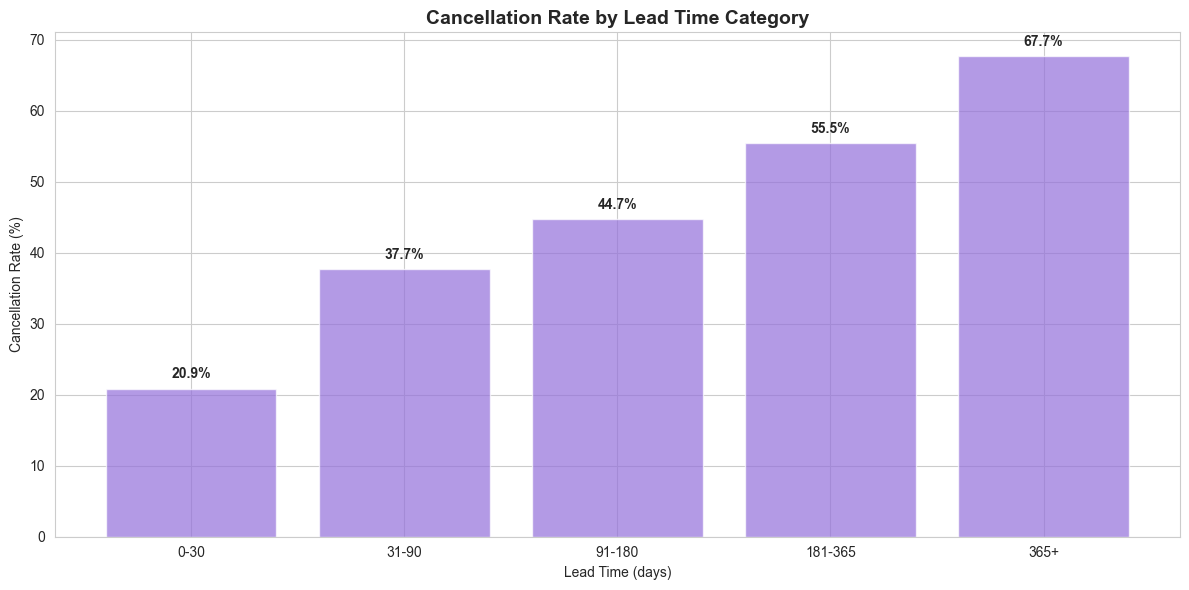

In [15]:
# Lead time vs cancellation
print("=== Lead Time Analysis ===")
df['lead_time_category'] = pd.cut(df['lead_time'], 
                                  bins=[0, 30, 90, 180, 365, np.inf],
                                  labels=['0-30', '31-90', '91-180', '181-365', '365+'])

lead_cancel = df.groupby('lead_time_category')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
lead_cancel.columns = ['lead_time_category', 'total_bookings', 'cancelled', 'cancellation_rate']
lead_cancel['cancellation_rate'] = lead_cancel['cancellation_rate'] * 100
display(lead_cancel)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(lead_cancel['lead_time_category'].astype(str), 
             lead_cancel['cancellation_rate'], color='mediumpurple', alpha=0.7)
ax.set_title('Cancellation Rate by Lead Time Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Cancellation Rate (%)')
ax.set_xlabel('Lead Time (days)')
for bar, rate in zip(bars, lead_cancel['cancellation_rate']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
           f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


## Step 7: Correlation Analysis


=== Correlation with Target Variable (is_canceled) ===


is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

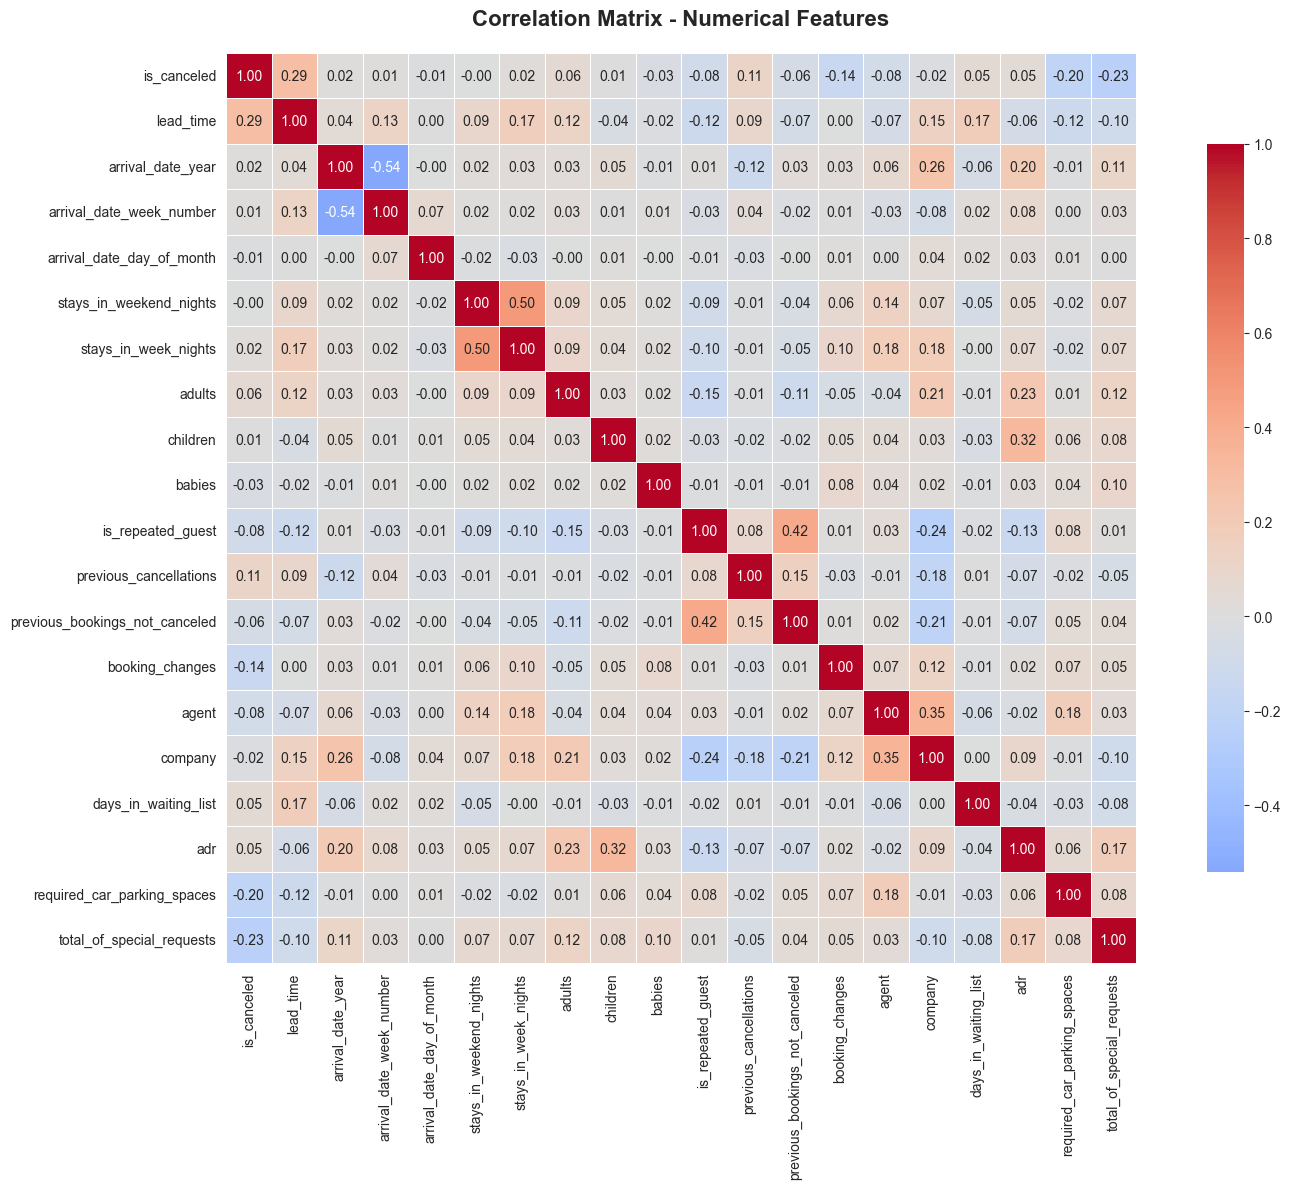

In [16]:
# Correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'is_canceled' in numerical_features:
    corr_matrix = df[numerical_features].corr()
    
    # Focus on correlation with target
    target_corr = corr_matrix['is_canceled'].sort_values(ascending=False)
    print("=== Correlation with Target Variable (is_canceled) ===")
    display(target_corr)
    
    # Heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


=== Top 10 Features Most Correlated with Cancellation ===


,Feature,Correlation
0,lead_time,0.293123
1,total_of_special_requests,-0.234658
2,required_car_parking_spaces,-0.195498
3,booking_changes,-0.144381
4,previous_cancellations,0.110133
5,is_repeated_guest,-0.084793
6,agent,-0.083114
7,adults,0.060017
8,previous_bookings_not_canceled,-0.057358
9,days_in_waiting_list,0.054186


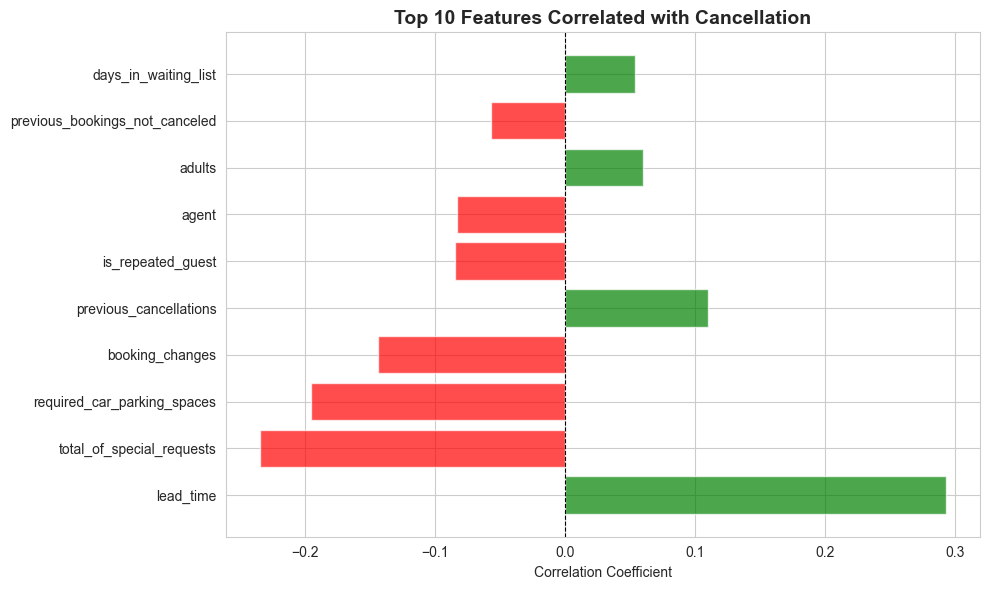

In [17]:
# Top features correlated with cancellation
print("=== Top 10 Features Most Correlated with Cancellation ===")
top_corr = target_corr.drop('is_canceled').abs().sort_values(ascending=False).head(10)
display(pd.DataFrame({
    'Feature': top_corr.index,
    'Correlation': [target_corr[feat] for feat in top_corr.index]
}))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in [target_corr[feat] for feat in top_corr.index]]
bars = ax.barh(range(len(top_corr)), [target_corr[feat] for feat in top_corr.index], color=colors, alpha=0.7)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.set_title('Top 10 Features Correlated with Cancellation', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


## Step 8: Time-based Analysis


=== Cancellation Rate by Arrival Month ===


,month,total_bookings,cancelled,cancellation_rate
0,January,5929,1807,30.477315
1,February,8068,2696,33.415964
2,March,9794,3149,32.152338
3,April,11089,4524,40.797186
4,May,11791,4677,39.665847
5,June,10939,4535,41.457172
6,July,12661,4742,37.453598
7,August,13877,5239,37.753117
8,September,10508,4116,39.170156
9,October,11160,4246,38.046595


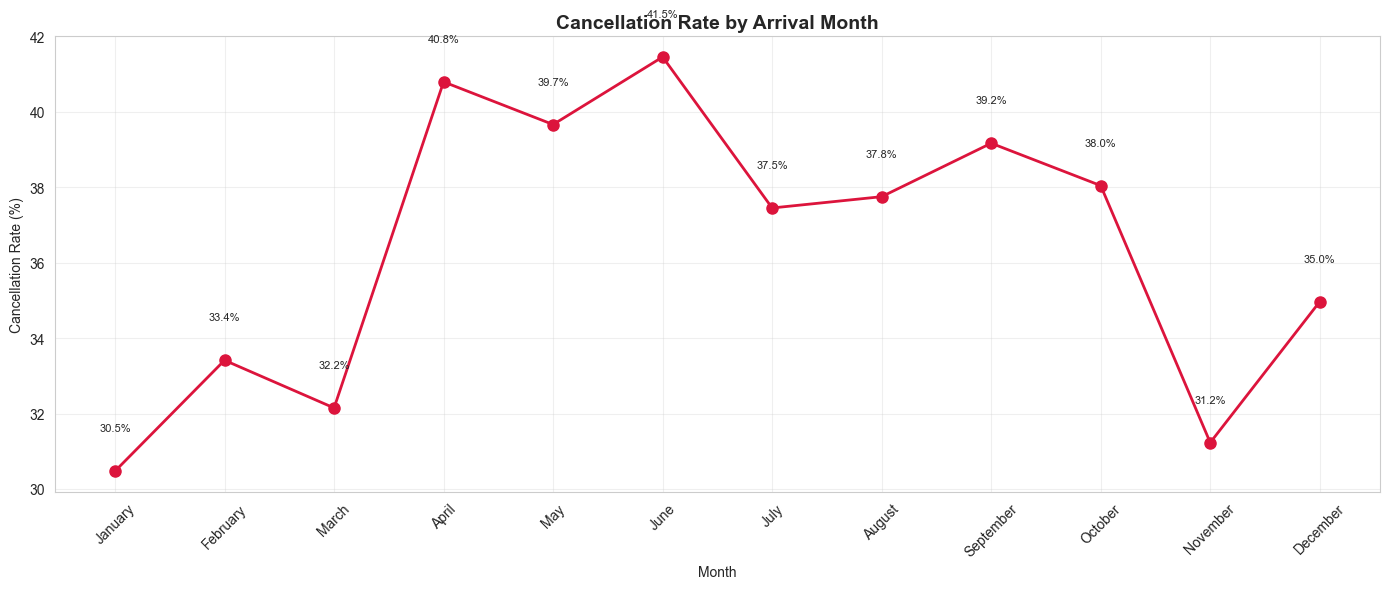

In [18]:
# Cancellation rate by month
print("=== Cancellation Rate by Arrival Month ===")
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

month_cancel = df.groupby('arrival_date_month')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
month_cancel.columns = ['month', 'total_bookings', 'cancelled', 'cancellation_rate']
month_cancel['cancellation_rate'] = month_cancel['cancellation_rate'] * 100
display(month_cancel)

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(month_cancel['month'], month_cancel['cancellation_rate'], 
       marker='o', linewidth=2, markersize=8, color='crimson')
ax.set_title('Cancellation Rate by Arrival Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Cancellation Rate (%)')
ax.set_xlabel('Month')
plt.xticks(rotation=45)
ax.grid(True, alpha=0.3)
for i, (month, rate) in enumerate(zip(month_cancel['month'], month_cancel['cancellation_rate'])):
    ax.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


## Step 9: Key Insights Summary


In [19]:
print("=" * 60)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 60)

print("\n1. TARGET DISTRIBUTION:")
print(f"   - Overall cancellation rate: {df['is_canceled'].mean()*100:.2f}%")
print(f"   - Class imbalance: {'Yes' if abs(df['is_canceled'].mean() - 0.5) < 0.1 else 'No'}")

print("\n2. TOP FACTORS INFLUENCING CANCELLATION:")
if 'deposit_type' in df.columns:
    deposit_high = df.groupby('deposit_type')['is_canceled'].mean().idxmax()
    print(f"   - Deposit Type: {deposit_high} has highest cancellation rate")
if 'lead_time' in df.columns:
    high_lead = df[df['lead_time'] > 180]['is_canceled'].mean()
    low_lead = df[df['lead_time'] <= 30]['is_canceled'].mean()
    print(f"   - Lead Time: Long lead times (>180 days) have {high_lead*100:.1f}% cancellation vs {low_lead*100:.1f}% for short lead times")

print("\n3. DATA QUALITY:")
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
if len(missing_cols) > 0:
    print(f"   - Columns with missing values: {len(missing_cols)}")
    print(f"   - Most missing: {missing_cols.idxmax()} ({missing_cols.max()} values)")
else:
    print("   - No missing values found")

print("\n4. FEATURE ENGINEERING OPPORTUNITIES:")
print("   - Create total_nights from weekend + weekday nights")
print("   - Create total_guests from adults + children + babies")
print("   - Extract date features (day of week, season)")
print("   - Create lead_time categories")
print("   - Calculate booking value (ADR × nights)")

print("\n" + "=" * 60)


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. TARGET DISTRIBUTION:
   - Overall cancellation rate: 37.04%
   - Class imbalance: No

2. TOP FACTORS INFLUENCING CANCELLATION:
   - Deposit Type: Non Refund has highest cancellation rate
   - Lead Time: Long lead times (>180 days) have 57.0% cancellation vs 18.6% for short lead times

3. DATA QUALITY:
   - Columns with missing values: 5
   - Most missing: company (112593 values)

4. FEATURE ENGINEERING OPPORTUNITIES:
   - Create total_nights from weekend + weekday nights
   - Create total_guests from adults + children + babies
   - Extract date features (day of week, season)
   - Create lead_time categories
   - Calculate booking value (ADR × nights)



## Summary

✓ Comprehensive EDA completed
✓ Key patterns and relationships identified
✓ Insights extracted for feature engineering
✓ Data quality assessed

**Next Steps**: Proceed to `03_spark_preprocessing.ipynb` for Spark-based data processing and feature engineering.
